In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.tree import plot_tree

In [2]:
dataset = pd.read_csv('Iris.csv')
dataset.set_index('Id',inplace=True)
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
dataset['Species'] = dataset['Species'].str.replace('Iris-','')

In [4]:
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [5]:
dataset.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
dataset['Species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [7]:
X = dataset.iloc[:,:-1]
Y = dataset.iloc[:,-1]

In [8]:
# sc_X = StandardScaler()
# X = sc_X.fit_transform(X)

In [9]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [10]:
classifier = DecisionTreeClassifier(criterion='gini')
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [11]:
y_pred = classifier.predict(X_test)
print(y_pred)

['virginica' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'setosa' 'versicolor' 'versicolor' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'setosa' 'versicolor' 'versicolor'
 'setosa' 'setosa' 'virginica' 'versicolor' 'setosa' 'setosa' 'virginica'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'setosa' 'virginica'
 'versicolor' 'setosa' 'virginica' 'virginica' 'versicolor' 'setosa'
 'virginica']


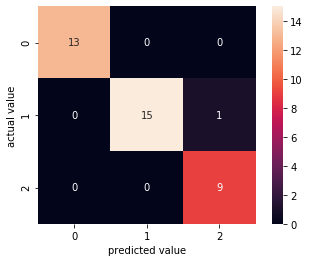

In [12]:
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, square=True, annot=True, cbar=True, cmap='rocket')
plt.xlabel('predicted value')
plt.ylabel('actual value')
plt.show()

In [13]:
acc = accuracy_score(Y_test, y_pred)
print(acc)

0.9736842105263158


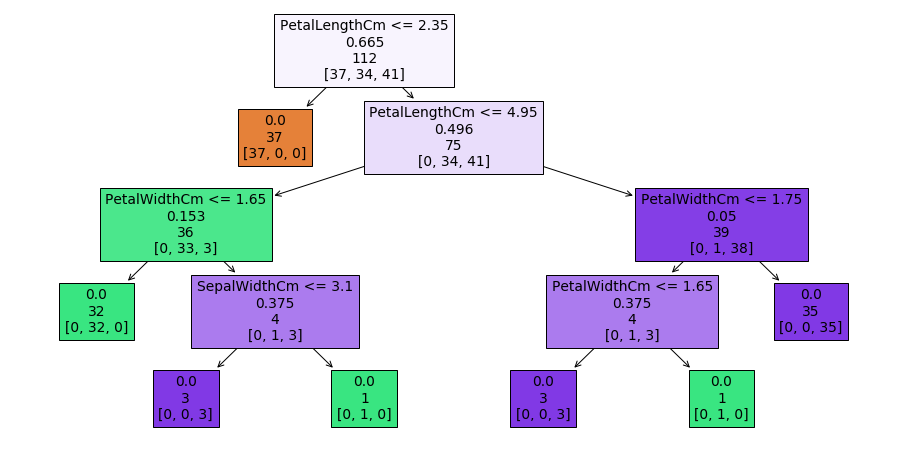

In [14]:
plt.figure(figsize=(16,8))
plot_tree(classifier, feature_names=dataset.columns[:-1], label=dataset.columns[-1],filled=True);